In [ ]:
!pip install highway-env  # Install the highway-env package which contains the intersection environment

In [ ]:
import gymnasium
import highway_env
from matplotlib import pyplot as plt
import time

env = gymnasium.make('intersection-v0', render_mode='rgb_array')
env.unwrapped.configure({
  "controlled_vehicles": 1,
  "initial_vehicle_count": 30,  # Increased vehicle count for dense traffic
  "spawn_probability": 0.8,  # Increased spawn probability for dense traffic
  "duration": 200,
  "observation": {
    "type": "Kinematics",
    "vehicles_count": 25,
    "features": ["presence", "x", "y", "vx", "vy", "heading"],
    "features_range": {
      "x": [-100, 100],
      "y": [-100, 100],
      "vx": [-20, 20],
      "vy": [-20, 20]
    },
    "absolute": True,
    "order": "sorted"
  }
})
obs, info = env.reset()





/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:518: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


In [ ]:
# Create a list to store unique identifiers for images (replace with your actual identifiers)
unique_arr = [f"image_{i}" for i in range(env.unwrapped.config["duration"])]

Step: 0, Reward: -5.0


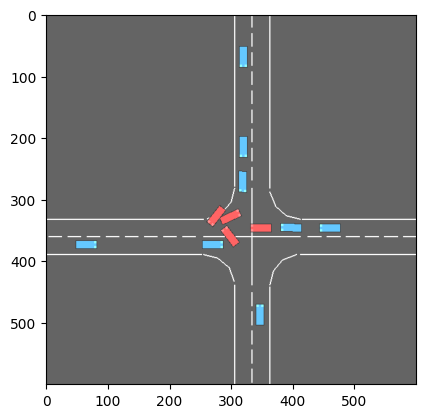

No controlled vehicles found on the road.


In [ ]:
# Simulation loop
from PIL import Image
for i in range(env.unwrapped.config["duration"]):
  action = env.action_space.sample()
  obs, reward, done, truncated, info = env.step(action)
  print(f"Step: {i}, Reward: {reward}")

  # Render the environment
  img = env.render()
  im = Image.fromarray(img)
  plt.imshow(img)
  plt.show()
  images_dir = '/content/sample_data/img'
  im.save(f"{images_dir}/{unique_arr[i]}.png")

  time.sleep(0.01)

  # Traffic signal monitoring (example)
  # Check if the road has a 'controlled_vehicles' attribute
  if hasattr(env.unwrapped.road, 'controlled_vehicles'):
    # Assuming the first controlled vehicle is at the intersection
    traffic_signal = env.unwrapped.road.controlled_vehicles[0].lane.traffic_lights[0]
    print("Traffic signal state:", traffic_signal.state)
  else:
    print("No controlled vehicles found on the road.")

  if done or truncated:
    break

env.close()


In [ ]:
import cv2
import os


# Get the image files from the directory
image_folder = '/content/sample_data/img'
video_dir = '/content/sample_data/img'
video_name = os.path.join(video_dir, 'simulation_video.avi')


images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

print("Video has been saved as /content/sample_data/simulation_video.avi")


Video has been saved as /content/sample_data/simulation_video.avi
